# Solution 1: ODE solvers
In this tutorial you will learn to solve an MCK (mass-damper-spring) using a Python ODE solver. The MCK has 1 DOF and consequently the state veector contains 2 entries; displacement and velocity. 

$$ \boldsymbol{q} = \begin{bmatrix} u \\ \dot{u} \end{bmatrix}$$

The Equation of Motion (EoM) is given by: 

$$ m\ddot{u} = -ku -c\dot{u} $$

## Part 1: definition of inputs
We start by defining the numerical values of all parameters:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
k =         1   # [N/n] 
c =         0.1 # [Ns/m]
m =         1   # [kg]

We want to solve the problem in the interval $ t \in [0,10] $, and get the solution with a resolution of $ \Delta t = 0.01$. Then, the vector of evaluation points will be defined as:

In [3]:
# Time interval
t_0 =       0       # initial time [s]
t_f =       10      # final time [s]
dt =        0.01    # time step size [s]

steps =     int(t_f/dt)  # integer number of steps [-]
tspan =     np.linspace(t_0,t_f,steps)   # vector of evaluation points [s]

The initial conditions for this example will be: $ u(0) = 1.0 $ and $ \dot{u}(0) = 0.0$.

In [4]:
# Initial conditions
init_disp = 1
init_velo = 0

## Part 2: the ODE solver
We will use solve_ivp (available via the SciPy package) to solve our MCK system. solve_ivp implements the 5th order Runge-Kutta scheme mentioned in the lectures. Checking help for solve_ivp shows how to call it:

`scipy.integrate.solve_ivp(fun, t_span, y0, t_eval, **options)`

OUTPUT:
- T: Evaluation points
- q: containts the state $\boldsymbol{q}$ at each time in the vector T

INPUT:
- `fun`: our ode function as explained during the lecture. It will compute the time derivatives of $q: \dot{q}=\mathcal{F} (q)$.
- `t_span`: list of the first and last time step
- `y0`: our initial state / conditions, $q(0)$.
- `t_eval`: times at which the solution should be stored. In our case this is the variable `tspan`
- `**options`: Options for the solvers. Here you can set things like error tolerances, maximum time step, event functions, etc. Check the SciPy docs for details. You will need to use this during the first assignment.  

Let's ignore the options for now and use the `solve_ivp` as our solver.

## Part 3: ODE function
Now we need to create our `fun`. In the help documentation of `solve_ivp` we can check for a short description on what the function does. It is stated that the function f(t,q) determines the differential equations. The function is called as:

$ \dot{\boldsymbol{q}} = $`fun`$(t,\boldsymbol{q}) $

Here, the variable $\dot{\boldsymbol{q}}$ is the time derivative of our current state, $t$ is the current time and $\boldsymbol{q}$ is our current state. As the solver requires this interface, we have to create our `fun` accordingly or we will get answers that have no physical meaning!


-----------------------------------------------------------------------------------------------------
**Problem**: Create a `fun` function that can receive the time, the state variable and the parameters as arguments. Implement the ODE function, $\mathcal{F}$, for the 1DOF MCK system such that $\dot{q}=\mathcal{F} (q)$.

*Hint*: Use the EoM and the fact that $\boldsymbol{q}(1) = u$ and $\boldsymbol{q}(2) = \dot{u}$.

-----------------------------------------------------------------------------------------------------


In [5]:
# Solve the problem of part 3 here

def q_dot(t,q):
    # A function that given a time "t" and a vector "q" returns the derivative of "q" --> q_dot
    u = q[0]       # First entry of vector q is the displacement
    v = q[1]       # Second entry of vector q is the velocity
    a = (-k*u - c*v)/m # From the equation of motion we can compute the acceleration
    return [v, a]

## Part 4: initial state
Next we need to create `q_0`. Note that the solver does not know / care what each entry in `q` represents. All the solver does is integrate things! You assign meaning to the entries in the state `q` when you define the initial conditions in `q_0`. This means that if you want the first entry in your state to be the displacement, `q_0[0]` should be set to `init_disp`. If you want the velocities to be the first entry, `q_0[0]` should be equal to the `init_velo`. It is up to you to decide this. 

!! IMPORTANT !!
The `q` you receive in your `fun` will have the same meaning as your `q_0`. This means if you assigned `q_0[0]` to be the `init_disp`, `q_n[0]` will be the current displacement. So make sure your usage of `q_n` inside the `fun` is consistent with your definition of `q_0` as otherwise you will get bogus results

-----------------------------------------------------------------------------------------------------
**Problem**: Create your `q_0`

*Hint*: Straight forward! Just make sure that the indices are consistent with what you wrote in `fun`.

-----------------------------------------------------------------------------------------------------

In [6]:
# Solve the problem of part 4 here

q0 = [init_disp, init_velo] # Defined in cell 3

## Part 5: Solve
### Part5.1: RK5 scheme
Once everything works the solver will return T and q. Each row in q corresponds to your state at that time-step. You can then plot your results with:

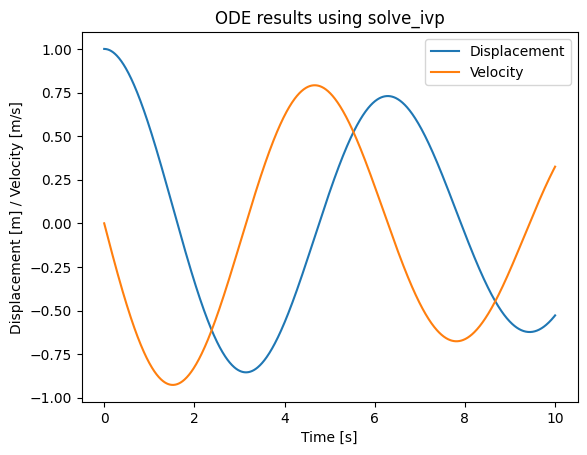

In [7]:
sol = solve_ivp(fun=q_dot,t_span=[t_0, t_f], y0=q0, t_eval=tspan)
# Plotting the solution
plt.plot(sol.t,sol.y[0],label="Displacement")
plt.plot(sol.t,sol.y[1],label="Velocity")
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m] / Velocity [m/s]')
plt.legend()
plt.title("ODE results using solve_ivp");

### Part5.2: FE scheme
In the cell above the RK5 scheme was used for the time integration. However, we can simply make our own time integration scheme as well.

-----------------------------------------------------------------------------------------------------
**Problem**: Create your `FE_solver` function

*Hint*: Start by making all required arrays, and then loop over the different time entries. How are the displacement, velocity, and acceleration linked? Can we use a vector notation?

---------------------------------------------------------------------------------------------------

In [8]:
# Solve the problem of part 5.2 here 

# FE solver
def FE_solver(qdot, tspan, q0):
    
    # Initialize the solution vector at the times we want to evaluate.
    # Remember, the vector q has two entries per time, so the solution is a matrix of size (nsteps x 2)
    nsteps = len(tspan)
    q = np.zeros((nsteps,2))
    
    # Fill initial step
    q[0] = q0
    
    # Loop over time entries
    for i,t in enumerate(tspan[1:]):
        # Evaluate the derivative using the function provided as argument
        dq = qdot(t,q[i]) 
        # Update the solution vector at step "i"
        q[i+1] = q[i] + np.multiply(dq,dt)
        
    return q

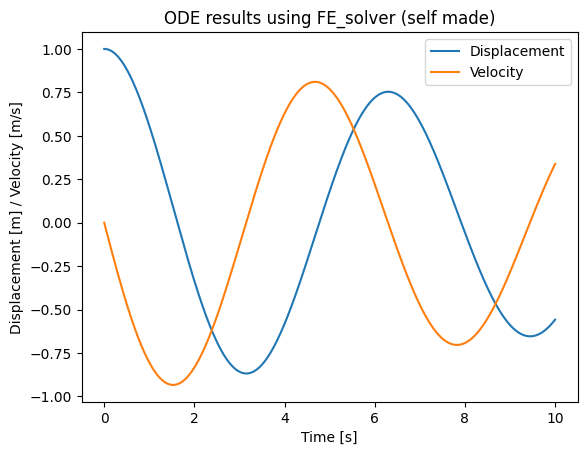

In [9]:
# Solve the problem
FE_sol = FE_solver(q_dot, tspan,q0)

# Plotting the solution
plt.plot(tspan,FE_sol[:,0],label="Displacement") 
# Note the slightly different notation than FE_sol.y[0]. This is because the .y result is intrinsicly bound to the solve_ivp function. However, adaptations to FE_solver could give the same result 
plt.plot(tspan,FE_sol[:,1],label="Velocity")
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m] / Velocity [m/s]')
plt.legend()
plt.title("ODE results using FE_solver (self made)");

## Part 5.3: Performance comparison
The Forward Euler method is less accurate than the `solve_ivp` solver and it accumulates as time evolves. Let's plot the error.

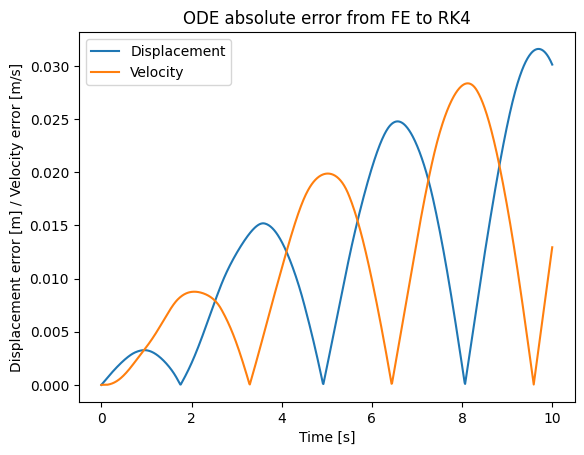

In [10]:
# Plotting the error
plt.plot(tspan,abs(FE_sol[:,0]-sol.y[0]),label="Displacement")
plt.plot(tspan,abs(FE_sol[:,1]-sol.y[1]),label="Velocity")
plt.xlabel('Time [s]')
plt.ylabel('Displacement error [m] / Velocity error [m/s]')
plt.legend()
plt.title("ODE absolute error from FE to RK4");

## Part 5.4 Other schemes and their benefits

As you would excpect, or may even emember from earlier courses, there are a lot of other different options for these transient problems. We will quicly give an overview of the main options and their benefits:

1.  **Forward Euler** <br>
    $$ w_{n+1} = w_n + \Delta t f(t_n, w_n) $$
    with the $f$ the slope of the tangent. This is the simplest method: single step and explicit. It has an order of convergence of 1. <br>
    The explicit nature does impose a limit on the allowable timestep $\Delta t$ to ensure stability. While the exact derivation is left for other courses, it is important to note that for the FE method the time step $\Delta t \leq \frac{-2}{\lambda}$ with $\lambda = \frac{\partial f}{\partial y}(\hat t, \hat y)$ with $f$ still being the slope of the tangent, and $(\hat t, \hat y)$ denoting the initial values of the problem.

    **Example**
    $$ 
    \begin{cases} y'= -10y^2 + 20 & when \hspace{5pt} t > 0 \\ y(0) = 0 \end{cases}
    $$
    Here we get $\lambda = \frac{\partial f}{\partial y}(\hat t, \hat y) = -20 \hat y $ so that $\Delta t \leq \frac{-2}{\lambda}  = \frac{1}{10\hat y} = \frac{1}{10 \cdot \sqrt{2}}$
    As a final sidenote the stability discussed here is what we consider "numerical stability". It could also be possible that the equation itself is unstable and approaches infinity after a certain amount of finite time. As a general rule this can happen when $\lambda \geq 0$, but the concept is not explored further.

2.  **Backward Euler** <br>
    $$ w_{n+1} = w_n + \Delta t f(t_{n+1}, w_{n+1}) $$
    This is a single step explicit metod. If f fepends linearly on y the solution can easily be computed, but more often than nod iterations are needed. While this takes some computaitonal power, the BE method is unconditionally stable, meaning that the time step can be increased.

3.  **Trapezoidal method** <br>
    $$ w_{n+n} = w_n + \frac{\Delta t}{2}(f(t_n,w_n) + f(t_{n+1,w_n+1})) $$
    Single step implicit. Given that this method used the Backward-Euler scheme, it is also unconditionally stable.
4.  **Modified euler method** <br>
    This method adapts the trapezoidal method by predicting the implicit term using an initial FE "predictor": <br>
    Step 1: predictor 
    $$ \bar w_{n+1}  = w_n + \Delta t f(t_n,w_n)$$
    Step 2: corrector
    $$ w_{n+1}  = w_n + \frac{\Delta t}{2} (f(t_n,w_n) + f(t_{n+1},\bar w_{n+11}))$$ 
    So we get the benefits from the modified-euler scheme without the added work from the implicit term.
    This method is only stable when $\Delta t \leq \frac{-2}{\lambda}$. However, it can be shown that this method has a larger order of convergence $O(\Delta t^2)$, indicating that larger time steps can be used to compensate for the additional work
5.  **Higher order methods** <br>
    Many igher order methdods have been developed, the most known ones are RK4 and RK5.

To illustrate the stability of the systems the concept of stability-regions is introduced. As said the stability depends on the value of $\lambda$, real or complex, positive or negative, as well as on the numerical stability introduced by the size of the time step. This is visualized below by C. Vuik (2018).

<center><img src=".././images/Module1/SolverTypes/StabilityRegionsScan.png" width="500" /></center>
